In [3]:
import requests as rq
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt

In [4]:
#Connecting the below url using request
flipkart = rq.get('https://www.flipkart.com/search?q=watch+smartwatch&sid=ajy%2Cbuh&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_5_na_na_na&as-pos=2&as-type=RECENT&suggestionId=watch+smartwatch%7CSmart+Watches&requestId=63db2c16-a28f-4bde-9fc1-20f237f15540&as-searchtext=watch')

In [25]:
flipkart.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e84a00.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [5]:
#parsing the content of wepage using Beautifulsoup
soup = bs(flipkart.content,'html.parser')

In [6]:
# Finding all the content under the class
flipkart_watch = soup.find_all('div',class_ ="_1AtVbE col-12-12")

In [7]:
len(flipkart_watch)

30

In [8]:
#getting the name of the watches and storing in the list
watch_n = []
name = soup.find_all('div', class_='col col-7-12')
for fp in name:
    watch_n.append(fp.find('div', class_ = '_4rR01T').text) 
    


In [174]:
len(watch_n)

24

In [9]:
star = soup.find_all('div',class_='gUuXy-')
    

In [10]:
##getting the star rating of the watches and storing in the list
stars = []
for j in star:
    stars.append(j.find('div',class_='_3LWZlK').text)

In [11]:
#getting the Rating of the watches and storing in the list
rating = []
for j in star:
    b = j.find('span',class_='_2_R_DZ').text
    b1 = b.split('R',-1)
    rating.append(b1[0])

In [131]:
len(rating)

24

In [12]:
#getting the current Price of the watches and storing in the list
oprice = []
price = soup.find_all('div',class_='col col-5-12 nlI3QM')
for p in price:
    oprice.append(p.find('div',class_='_30jeq3 _1_WHN1').text)

In [13]:
#getting the MRP of the watches and storing in the list
mrp = []
for p in price:
    mrp.append(p.find('div',class_='_3I9_wc _27UcVY').text)

In [14]:
#getting the Offer of the watches and storing in the list
dis = []
for p in price:
    #dis.append(p.find('div',class_='_3Ay6Sb').text)
    d = p.find('div',class_='_3Ay6Sb').text
    d1 = d.split('o',-1)
    dis.append(d1[0])

In [15]:
#creating features for the collected data using dictionary
watch_data = {'Watch Name':watch_n,'Price':oprice,'MRP':mrp,'Discount':dis,'Stars':stars}

In [16]:
# Creating Dataset using pandas Dataframe
watch_ds  = pd.DataFrame(watch_data)

In [17]:
watch_ds

,Watch Name,Price,MRP,Discount,Stars
0,"boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...","₹1,699","₹5,990",71%,4
1,"Fire-Boltt Ninja Pro Max 1.83"" Display with Sp...","₹1,399","₹7,999",82%,4.1
2,Fire-Boltt Ninja Calling Pro Plus 1.83 inch Di...,"₹1,799","₹9,999",82%,4.1
3,Fire-Boltt Ninja Calling Pro 1.69 inch Bluetoo...,"₹1,599","₹7,999",80%,4.3
4,"Fire-Boltt Talk 1.28"" Bluetooth Calling Smart ...","₹1,799","₹9,999",82%,4.1
5,"Fire-Boltt Talk 1.28"" Bluetooth Calling Smart ...","₹1,799","₹9,999",82%,4.1
6,"Fire-Boltt Talk 1.28"" Bluetooth Calling Smart ...","₹1,799","₹9,999",82%,4.1
7,"Fire-Boltt Cobra 1.78"" AMOLED Army Grade Build...","₹3,699","₹19,999",81%,4.2
8,Noise ColorFit Caliber Smart Watch with 15-day...,"₹1,499","₹3,999",62%,4.2
9,"Fire-Boltt Apollo 1.43"" AMOLED Display Smartwa...","₹2,999","₹18,999",84%,4.2


In [2]:
!pip install pyPDF2

     ------------------------------------ 232.6/232.6 kB 748.6 kB/s eta 0:00:00


In [20]:
# Displaying the features which created
watch_ds.columns

Index(['Watch Name', 'Price', 'MRP', 'Discount', 'Stars'], dtype='object')

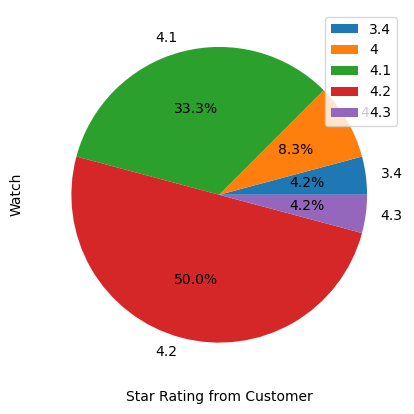

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


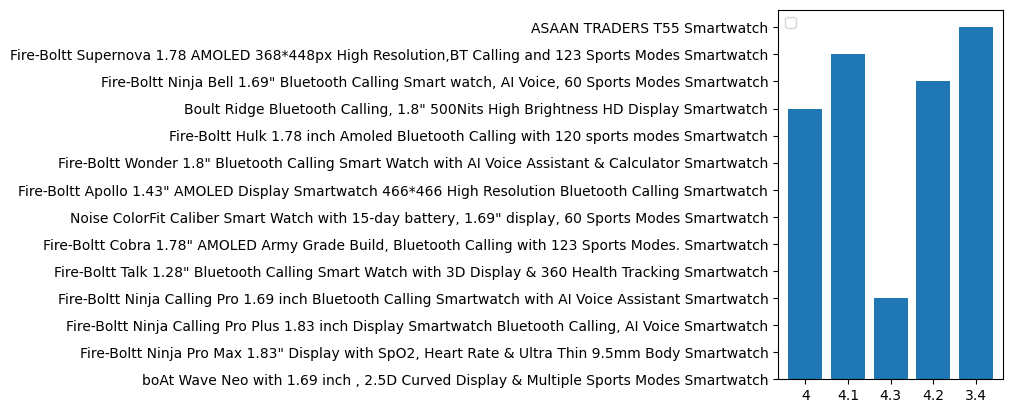

In [21]:
# Creating the pie chart for the star feature of the dataset
watch_ds.groupby(['Stars']).count().plot(y='Watch Name',kind='pie',autopct = '%2.1f%%')
plt.legend()
plt.xlabel("Star Rating from Customer")
plt.ylabel("Watch")
plt.show()
plt.subplot(1,2,2)
plt.bar(watch_ds['Stars'],watch_ds['Watch Name'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


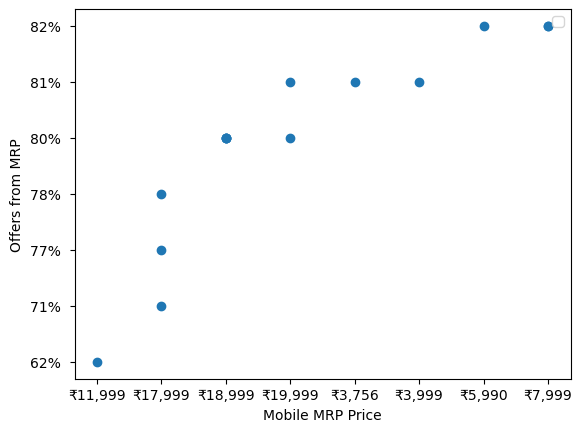

In [22]:
# plotting the mrp and offer feature data
plt.scatter(watch_ds['MRP'].sort_values().head(15),watch_ds['Discount'].sort_values().head(15))
plt.legend()
plt.xlabel("Mobile MRP Price")
plt.ylabel("Offers from MRP")
plt.show()